In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = "Hiragino Sans"
main_color = "#FFA666"
# plt.rcParams['font.weight'] = ""

In [2]:
movies = pd.read_csv("../data/ml-1m/movies.csv")
movies

,movie_id,title,genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1990
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,1990
3,4,Waiting to Exhale (1995),Comedy|Drama,1990
4,5,Father of the Bride Part II (1995),Comedy,1990
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


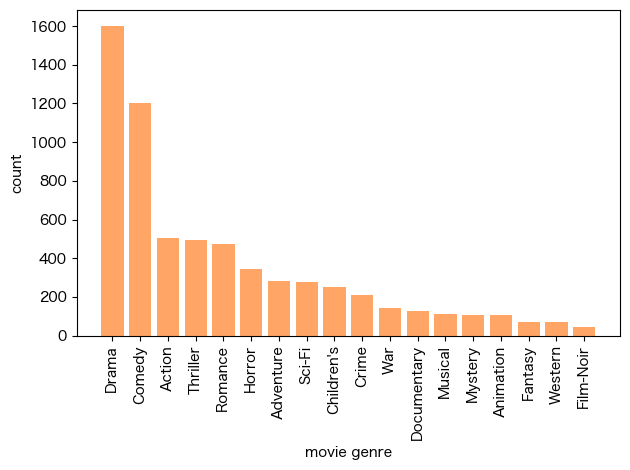

In [4]:
genre_count = {}
for genres in movies.genre.apply(lambda s: s.split("|")):
    for genre in genres:
        if genre not in genre_count:
            genre_count[genre] = 0
        genre_count[genre] += 1

genre_count = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)
keys = list(map(lambda x: x[0], genre_count))
values = list(map(lambda x: x[1], genre_count))

fig, ax = plt.subplots()
ax.bar(keys, values, color=main_color)
ax.tick_params('x', labelrotation=90)
ax.set_xlabel("movie genre")
ax.set_ylabel("count")
fig.tight_layout()
fig.savefig("data/fig_movie_genre.pdf", format="pdf")

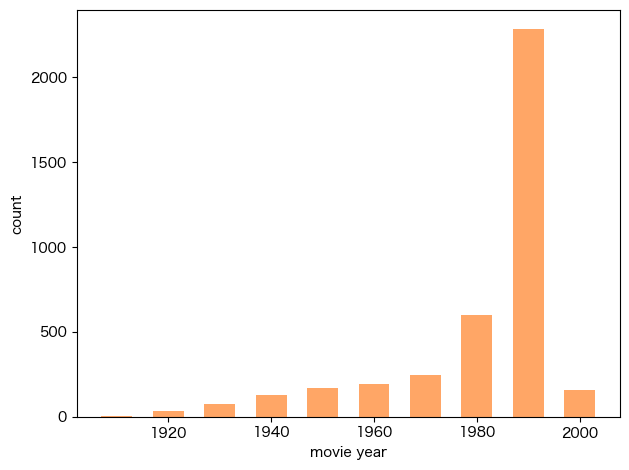

In [6]:
year_count = movies.year.value_counts()

fig, ax = plt.subplots()
# ax.set_title("映画の公開年の分布")
ax.bar(year_count.keys(), year_count, width=6.0, color=main_color)
ax.set_xlabel("movie year")
ax.set_ylabel("count")
fig.tight_layout()
fig.savefig("data/fig_movie_year.pdf", format="pdf")

In [ ]:
ratings = pd.read_csv("../data/ml-1m/ratings.dat", sep="::", engine="python", header=None)
ratings.columns = ["user_id", "movie_id", "rate", "timestamp"]
ratings

In [ ]:
rate_count = ratings.rate.value_counts()
fig, ax = plt.subplots()
# ax.set_title("映画の評価の分布")
ax.bar(rate_count.keys(), rate_count, color=main_color)
ax.set_xlabel("映画の評価")
ax.set_ylabel("レビュー数")
fig.tight_layout()
fig.savefig("data/fig_movie_rate.pdf", format="pdf")

In [ ]:
users = pd.read_csv("../data/ml-1m/users.csv")
users

In [ ]:
age_count = users.age.value_counts()
keys = [
    "Under 18",
    "18-24",
    "25-34",
    "35-44",
    "45-49",
    "50-55",
    "56+",
]
fig, ax = plt.subplots()
# ax.set_title("ユーザの年齢層の分布")
ax.bar(keys, list(map(lambda x: age_count[x], keys)), color=main_color)
ax.set_xlabel("顧客の年代")
ax.set_ylabel("人数")
fig.tight_layout()
fig.savefig("data/fig_user_age.pdf", format="pdf")

In [ ]:
gender_count = users.gender.value_counts()
fig, ax = plt.subplots()
# ax.set_title("ユーザの性別の分布")
ax.bar(["Male", "Female"], gender_count, color=main_color)
ax.set_xlabel("顧客の性別")
ax.set_ylabel("人数")
fig.tight_layout()
fig.savefig("data/fig_user_gender.pdf", format="pdf")

In [ ]:
occupation_count = users.occupation.value_counts()

fig, ax = plt.subplots()
ax.tick_params('x', labelrotation=90)
# ax.set_title("ユーザの職種の分布")
ax.bar(occupation_count.keys(), occupation_count, color=main_color)
ax.set_xlabel("顧客の職種")
ax.set_ylabel("人数")
fig.tight_layout()
fig.savefig("data/fig_user_occupation.pdf", format="pdf")

In [ ]:
fig.tight_layout()
fig.savefig("data/ml-statistics.pdf", format="pdf")